<a href="https://colab.research.google.com/github/TetianaMar-888/Python_for_ds_tasks/blob/main/%D0%94%D0%BE%D0%BC%D0%B0%D1%88%D0%BD%D1%94_%D0%B7%D0%B0%D0%B2%D0%B4%D0%B0%D0%BD%D0%BD%D1%8F_%E2%84%963_Python_%2B_SQL_Marinoshenko_Tetiana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Завдання на використання SQL в Python

1.Встановіть бібліотеку `mysql-connector-python` через pip aбо через conda.

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.9/33.9 MB 21.1 MB/s eta 0:00:00


In [3]:
import mysql.connector
from mysql.connector.connection import MySQLConnection
import datetime

2.В змінній `con` створіть підключення до бази даних employees за аналогією того, як це робилось в лекції:

In [68]:
con = mysql.connector.connect(user='student', password='IAmLearningSQL',
                              host='shinkansen.proxy.rlwy.net',
                              database='employees',
                              port= 50507)

3.Виберіть максимальну і мінімальну дати найму співробітників використовуючи `con.cursor()`. Аби отримати результати в кінці, виконайте `cursor.fetchall()`.

In [69]:
cursor = con.cursor()
cursor.execute("SELECT MAX(hire_date), MIN(hire_date) FROM employees")
cursor.fetchall()

[(datetime.date(2000, 1, 28), datetime.date(1985, 1, 1))]

In [10]:
#dir(cursor)

Очікуваний результат:  
    `[(datetime.date(2000, 1, 28), datetime.date(1985, 1, 1))]`

4.Давайте зберемо інформацію про останню ЗП кожного співробіткника в базі. З використанням `con.cursor()` виберіть з таблиці `salaries` для кожного співробітника його номер, останню в базі даних (тобто ту, що відповідає найновішій `to_date`) ЗП, та значення `from_date`, `to_date` для цієї ЗП.

Результати запишіть у pandas DataFrame, який збережіть у змінну `res`. Як взяти з курсора назви колонок - вже наведено. На екран виведіть назви колонок в змінній `res`, розмір цього датафрейму та перші 3 записи в ньому.

УВАГА! Зверніть увагу, що ЗП може оновлюватись протягом одного дня, тобто є випадки, коли апдейт ЗП був в певний день, скажімо 2001-01-01 і потім стався ще один апдейт ЗП цьому співробітнику цього самого дня. Запит має це враховувати.
Також, теоретично ЗП може бути зменшена. Тож, брати дату з максимальною ЗП буде неправильно з точки зору бізнес логіки. Треба саме останнє історичне значення ЗП кожного співробітника.

In [70]:
res ="""
SELECT s.emp_no, s.salary, s.from_date, s.to_date
FROM salaries s
INNER JOIN (
    SELECT emp_no, MAX(to_date) AS max_to_date
    FROM salaries
    GROUP BY emp_no
) AS last_sal
ON s.emp_no = last_sal.emp_no AND s.to_date = last_sal.max_to_date
ORDER BY s.emp_no
"""

cursor.execute(res)
data = cursor.fetchall()

In [71]:
columns = [desc[0] for desc in cursor.description]
res = pd.DataFrame(data, columns=columns)

In [72]:
import pandas as pd

In [73]:
print("Назви колонок:", res.columns.tolist())
print("Розмір DataFrame:", res.shape)
print("Перші 3 записи:\n", res.head(3))

Назви колонок: ['emp_no', 'salary', 'from_date', 'to_date']
Розмір DataFrame: (300180, 4)
Перші 3 записи:
    emp_no  salary   from_date     to_date
0   10001   88958  2002-06-22  9999-01-01
1   10002   72527  2001-08-02  9999-01-01
2   10003   43311  2001-12-01  9999-01-01


In [74]:
res.head(3)

,emp_no,salary,from_date,to_date
0,10001,88958,2002-06-22,9999-01-01
1,10002,72527,2001-08-02,9999-01-01
2,10003,43311,2001-12-01,9999-01-01


Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1lNvzbAebtkj3C2v-I5AE6HkMH8MTI1kA)

5.В утвореній вибірці в змінній `res` скільки значень `to_date` рівні `9999-01-01`, а скільки - ні? Увага! Для виконання цього завдання важливо розуміти, який тип даних у значень колонки `to_date`. Зʼясуйте це, і потім напишіть фільтр для виводу потрібного результату.

In [97]:
print(res['to_date'].dtype)

object


In [98]:
res['to_date_str'] = res['to_date'].apply(lambda x: str(x)[:10])

In [102]:
current_employees = res[res['to_date_str'] == '9999-01-01']

In [103]:
print("Кількість поточних співробітників:", len(current_employees))

Кількість поточних співробітників: 240124


In [104]:
count_9999 = (res['to_date_str'] == '9999-01-01').sum()
count_not_9999 = (res['to_date_str'] != '9999-01-01').sum()
print("to_date_str = 9999-01-01:", count_9999)
print("to_date_str != 9999-01-01:", count_not_9999)

to_date_str = 9999-01-01: 240124
to_date_str != 9999-01-01: 60056


6.Виведіть візуально розподіл (гістограму) зарплат співробітників, які досі працюють в компанії, використовуючи результат попереднього завдання. Співробітниками, які досі працюють в компанії вважаємо тих, в кого to_date має значення 9999-01-01. Обовʼязково підпишіть графік і вісі.

Ці три завдання - приклад, як нам може бути зручно витягнути дані з бази певним запитом, а потім використати витягнуту вибірку у Python для подальшого аналізу.

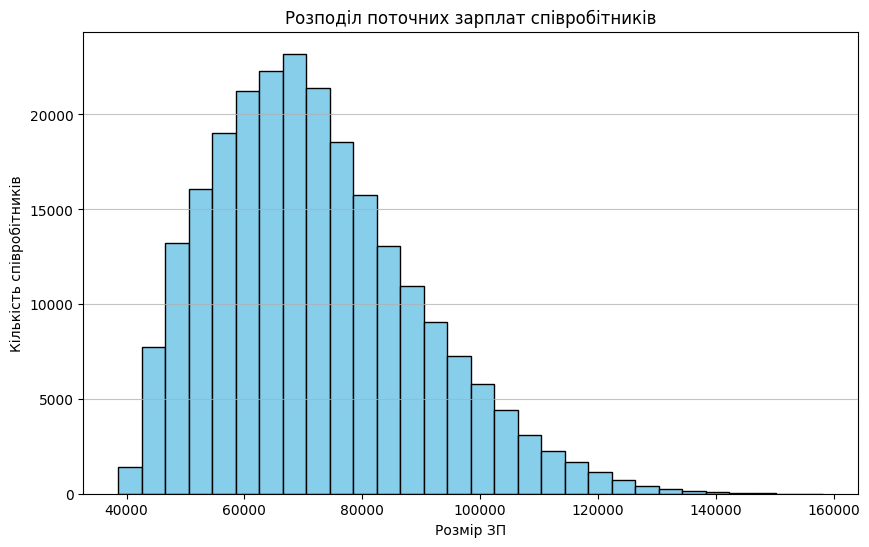

In [105]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.hist(current_employees['salary'], bins=30, color='skyblue', edgecolor='black')
plt.title('Розподіл поточних зарплат співробітників')
plt.xlabel('Розмір ЗП')
plt.ylabel('Кількість співробітників')
plt.grid(axis='y', alpha=0.75)
plt.show()

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1j8MHLC1E0revbQLM9B0UJs6tVEgoWhmK)

НЕ ЗАБУВАЄМО ЗАКРИТИ ПІДКЛЮЧЕННЯ ДО БАЗИ :)

In [106]:
con.close()